In [1]:
from net_class import cnn
import torch
import matplotlib.pyplot as plt
import numpy as np

model = cnn()
model.load_state_dict(torch.load('models/cnn_clf.pth'))

<All keys matched successfully>

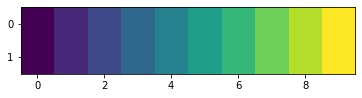

In [2]:
# COLOR MAP FOR REFERENCE

concat = np.concatenate((np.arange(0,10),np.arange(0,10))).reshape(2,10)
plt.imshow(concat)

with the above color mapping, we understand that the darker color represents a lower weight, while a brighter (yellower) color represents a higher weight
# Let's visualize the features for each layer

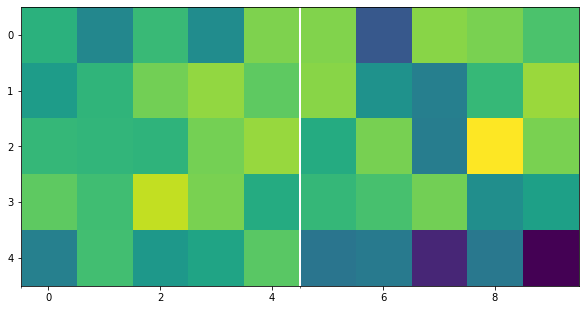

In [3]:
conv1 = model.c1.weight.detach().numpy()
c1 = np.reshape(conv1, (-1, 5, 5))

c1_cat = np.concatenate((c1[:]), axis=1)

plt.figure(figsize=(10,10))
plt.imshow(c1_cat)
ax = plt.gca()
ax.set_xticks(np.arange(-.5, 5, 5), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# first conv layer:

these features look pretty random, but we can sort of see a semicircle on the right of the first ceature, and some diagonal patterns on the right side

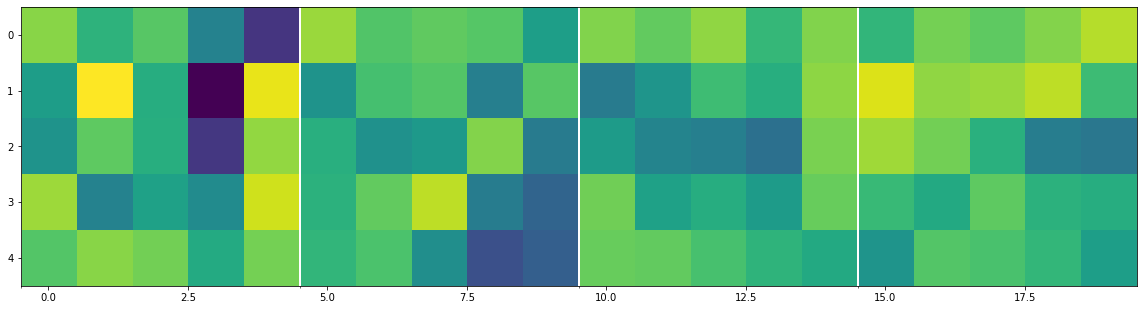

In [4]:
conv2 = model.c2.weight.detach().numpy()
c2 = np.reshape(conv2, (-1, 5, 5))

c2_cat = np.concatenate((c2[:]), axis=1)

plt.figure(figsize=(20, 20))
plt.imshow(c2_cat)
ax = plt.gca()
ax.set_xticks(np.arange(-.5, 15, 5), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)


# second conv layer:

we can see that some patterns emerge from some of these features, the second and last one obviously detects some sort of diagonal, although the other ones still look somewhat random
# And finally, the weights for the linear layer
each row represents the linear matrix for each output

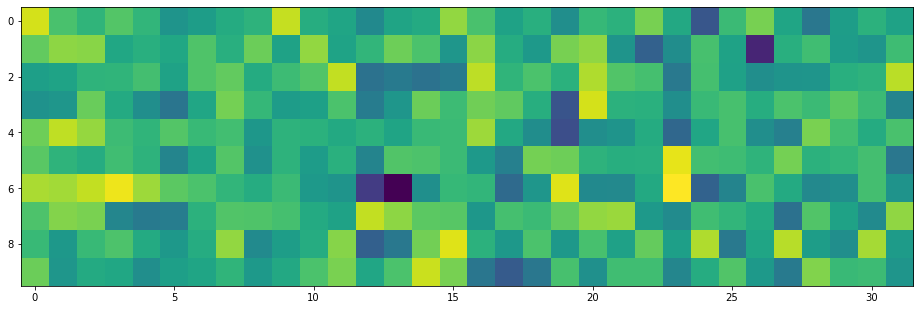

In [5]:
l1 = model.l1.weight.detach().numpy()
plt.figure(figsize=(16,16))
plt.imshow(l1)

ok all of these look really random
# let's push a handwritten '0' through the convnet and see what it looks like at each stage